Plotting Mutation Frequencies...


C:\Users\morel\AppData\Local\Temp\ipykernel_14244\3558831181.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


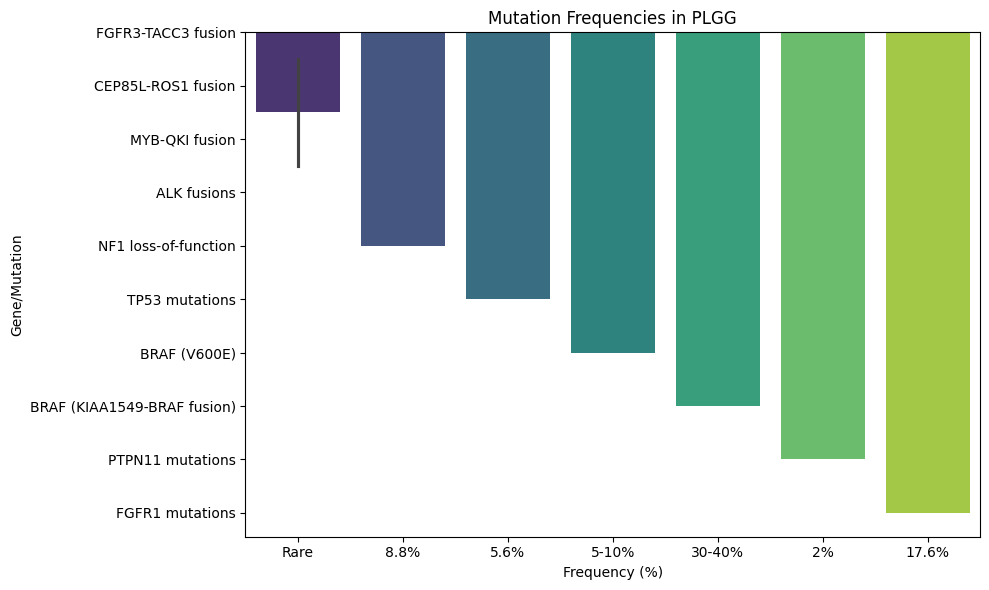

Creating and Querying Database...
Top 3 Most Frequent Mutations:
                 Gene/Mutation Frequency in PLGG (%)
0  BRAF (KIAA1549-BRAF fusion)                30-40%
1                 BRAF (V600E)                 5-10%
2              FGFR1 mutations                 17.6%
Analyzing Clinical Impacts...


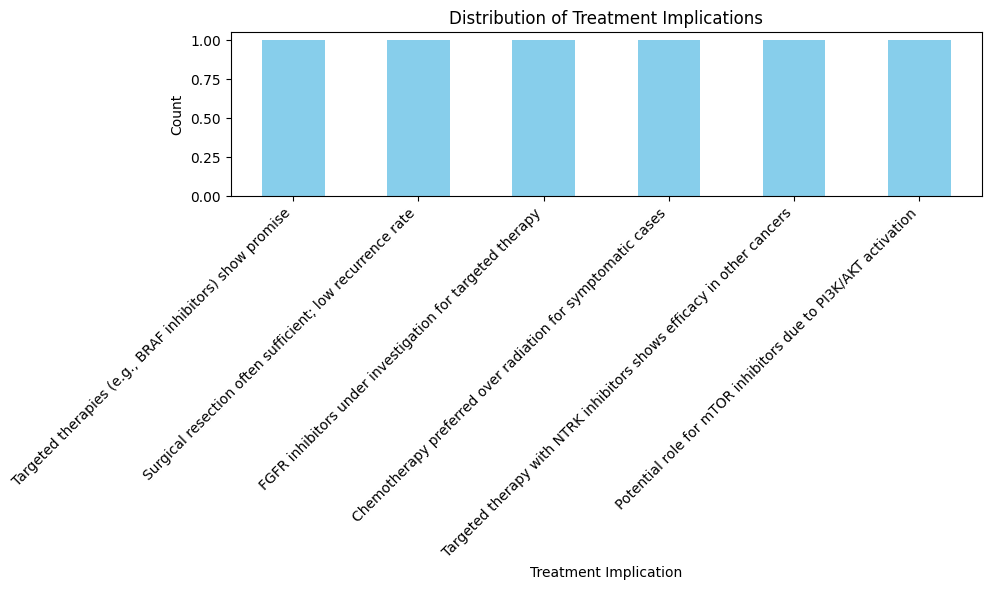

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

# Load Excel file with all sheets (Plgg Database)
data_path =r"C:\Users\morel\OneDrive\שולחן העבודה\מדעי המוח - מדעי הנתונים תואר שני\תכנות-פייתון מתקדם\PROJECT\PLGG_Database.xlsx"
data = pd.read_excel(data_path, sheet_name=None)  # Load all sheets into a dictionary

# Extract individual DataFrames
mutation_frequencies = data["Mutation Frequencies"]
biological_mechanisms = data["Biological Mechanisms"]
clinical_impacts = data["Clinical Impacts"]

# Example 1: Analyze Mutation Frequencies and Visualize
def plot_mutation_frequencies():
    mutation_frequencies_sorted = mutation_frequencies.sort_values(by="Frequency in PLGG (%)", ascending=False)
    plt.figure(figsize=(10, 6))
    sns.barplot(
        data=mutation_frequencies_sorted,
        x="Frequency in PLGG (%)",
        y="Gene/Mutation",
        palette="viridis"
    )
    plt.title("Mutation Frequencies in PLGG")
    plt.xlabel("Frequency (%)")
    plt.ylabel("Gene/Mutation")
    plt.tight_layout()
    plt.show()

# Example 2: Create and Query an SQLite Database
def create_and_query_database():
    # Connect to SQLite database (or create it)
    conn = sqlite3.connect("plgg_data.db")

    # Load data into SQL table
    mutation_frequencies.to_sql("mutation_frequencies", conn, if_exists="replace", index=False)
    biological_mechanisms.to_sql("biological_mechanisms", conn, if_exists="replace", index=False)
    clinical_impacts.to_sql("clinical_impacts", conn, if_exists="replace", index=False)

    # Example Query: Retrieve top 3 most frequent mutations
    query = """
    SELECT `Gene/Mutation`, `Frequency in PLGG (%)` 
    FROM mutation_frequencies
    ORDER BY CAST(SUBSTR(`Frequency in PLGG (%)`, 1, INSTR(`Frequency in PLGG (%)`, '-')-1) AS FLOAT) DESC
    LIMIT 3;
    """
    top_mutations = pd.read_sql_query(query, conn)
    print("Top 3 Most Frequent Mutations:")
    print(top_mutations)

    # Close the connection
    conn.close()

# Example 3: Analyze Clinical Impacts
def analyze_clinical_impacts():
    # Count occurrences of each treatment implication
    treatment_counts = clinical_impacts["Treatment Implications"].value_counts()

    # Plot the results
    plt.figure(figsize=(10, 6))
    treatment_counts.plot(kind="bar", color="skyblue")
    plt.title("Distribution of Treatment Implications")
    plt.xlabel("Treatment Implication")
    plt.ylabel("Count")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

# Run examples
if __name__ == "__main__":
    print("Plotting Mutation Frequencies...")
    plot_mutation_frequencies()

    print("Creating and Querying Database...")
    create_and_query_database()

    print("Analyzing Clinical Impacts...")
    analyze_clinical_impacts()

In [2]:
import pandas as pd
import plotly.graph_objects as go

# Load the files (PLGG_vs_PHGG_Comparison)
df = pd.read_excel(r"C:\Users\morel\OneDrive\שולחן העבודה\מדעי המוח - מדעי הנתונים תואר שני\תכנות-פייתון מתקדם\PROJECT\PLGG_vs_PHGG_Comparison.xlsx")

fig = go.Figure(data=[go.Table(
    header=dict(values=list(df.columns),
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[df[col] for col in df.columns],
               fill_color='lavender',
               align='left'))
])

fig.update_layout(title="PLGG vs PHGG Comparison", title_x=0.5)
fig.show()

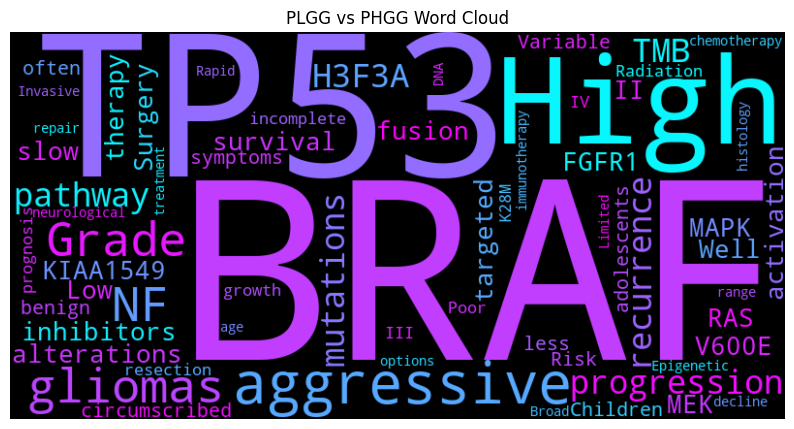

In [3]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# file- PLGG_vs_PHGG_Comparison

# Combine all text into a single string
text_data = " ".join(df['PLGG (Pediatric Low-Grade Glioma)'].astype(str).tolist() +
                     df['PHGG (Pediatric High-Grade Glioma)'].astype(str).tolist())

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='cool').generate(text_data)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("PLGG vs PHGG Word Cloud")
plt.show()

In [4]:
import plotly.express as px
# file- PLGG_vs_PHGG_Comparison
# Transform data for sunburst visualization
sunburst_data = []
for _, row in df.iterrows():
    sunburst_data.append([row['Category'], "PLGG", row['PLGG (Pediatric Low-Grade Glioma)']])
    sunburst_data.append([row['Category'], "PHGG", row['PHGG (Pediatric High-Grade Glioma)']])

sunburst_df = pd.DataFrame(sunburst_data, columns=["Category", "Type", "Value"])

fig = px.sunburst(sunburst_df, path=["Category", "Type", "Value"], 
                  title="PLGG vs PHGG Sunburst Visualization",
                  color_discrete_sequence=px.colors.qualitative.Set3)

fig.update_layout(margin=dict(t=40, l=0, r=0, b=0))
fig.show()

In [7]:
import pandas as pd 

# Load the CVS file 
file_path=(r"C:\Users\morel\OneDrive\שולחן העבודה\מדעי המוח - מדעי הנתונים תואר שני\תכנות-פייתון מתקדם\PROJECT\PLGG_HGG_locations_with_mutations.csv")

def load_and_display_data(file_path):
    try:
        # Read the CSV file
        df=pd.read_csv(file_path)

        # Display the first few rows of the dataset
        print("Dataset Preview")
        print(df.head())

        # Display summary statistics
        print("\nSummary Statistics:")
        print(df.describe(include="all"))

        # Display unique tumor types
        print("\nUnique Tumor Types:")
        print(df["Tumor_Type"])

        # Display data grouped by tumor type 
        print("\nGrouped Data by Tumor Type:")
        grouped_data=df.groupby("Tumor_Type").agg({
            "Location": lambda x: list(x),
            "Prevalence_Precentage":"mean",
            "Common_Mutations": lambda x: list(x)
        })
        print(grouped_data)
    
    except FileNotFoundError:
        print("Error: The file was not found. Please check the file path.")
    except Exception as e:
        print(f"An error occurred: {e}")

# Run the function to display data 
load_and_display_data(file_path)

Dataset Preview
  Tumor_Type                   Location  Prevalence_Percentage  \
0       PLGG                 Cerebellum                     18   
1       PLGG                  Brainstem                     12   
2       PLGG  Hypothalamus/Optic Chiasm                     32   
3       PLGG                   Cerebrum                     22   
4        HGG               Frontal Lobe                     33   

       Common_Mutations  
0       BRAF V600E, NF1  
1  KIAA1549-BRAF fusion  
2       BRAF V600E, NF1  
3     BRAF V600E, FGFR1  
4      IDH1, TP53, ATRX  

Summary Statistics:
       Tumor_Type   Location  Prevalence_Percentage Common_Mutations
count           9          9               9.000000                9
unique          2          8                    NaN                7
top           HGG  Brainstem                    NaN  BRAF V600E, NF1
freq            5          2                    NaN                2
mean          NaN        NaN              20.222222              

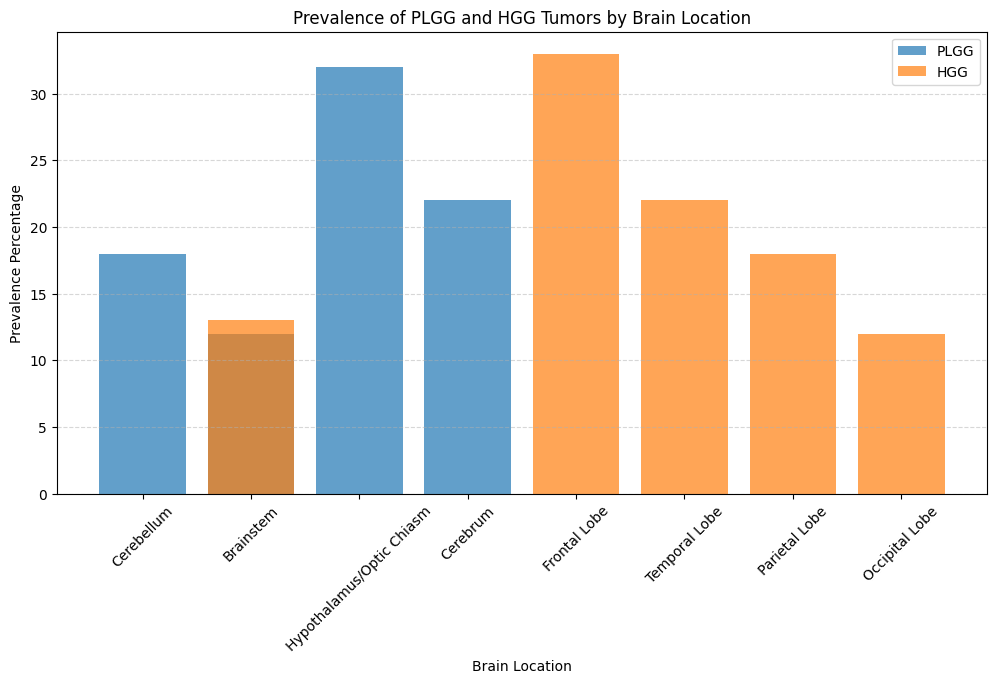

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CVS file- PLGG_HGG_locations_with_mutations.csv
file_path=(r"C:\Users\morel\OneDrive\שולחן העבודה\מדעי המוח - מדעי הנתונים תואר שני\תכנות-פייתון מתקדם\PROJECT\PLGG_HGG_locations_with_mutations.csv")
df=pd.read_csv(file_path)

# Group the data by tumor type and sum the prevalence percentages
plgg_data = df[df["Tumor_Type"] == "PLGG"]
hgg_data = df[df["Tumor_Type"] == "HGG"]

# Plot PLGG data
plt.figure(figsize=(12, 6))
plt.bar(plgg_data["Location"], plgg_data["Prevalence_Percentage"], label="PLGG", alpha=0.7)

# Plot HGG data
plt.bar(hgg_data["Location"], hgg_data["Prevalence_Percentage"], label="HGG", alpha=0.7)

# Customization
plt.title("Prevalence of PLGG and HGG Tumors by Brain Location")
plt.xlabel("Brain Location")
plt.ylabel("Prevalence Percentage")
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.5)

# Show the plot
plt.show()

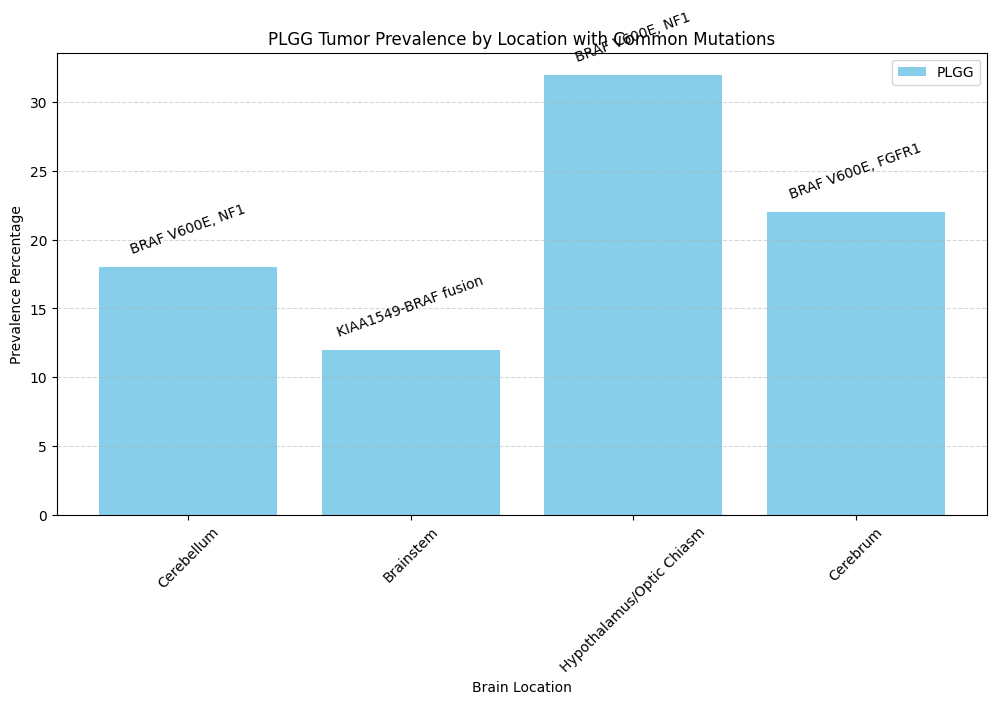

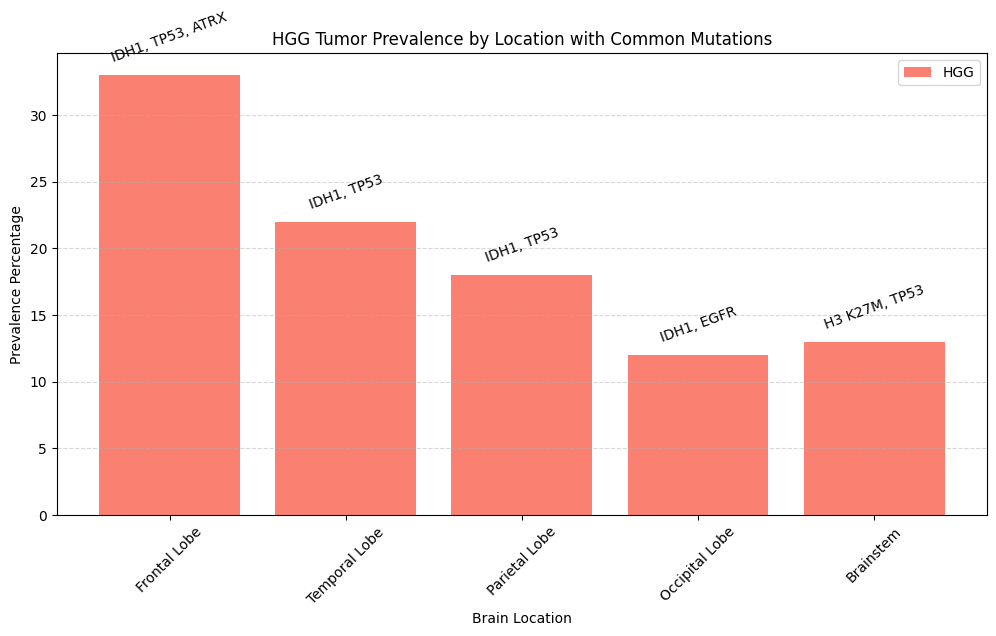

In [6]:
# Create separate bar charts for PLGG and HGG with locations and corresponding genes
# file- PLGG_HGG_locations_with_mutations.csv
# Plot for PLGG
plt.figure(figsize=(12, 6))
plt.bar(plgg_data["Location"], plgg_data["Prevalence_Percentage"], color='skyblue', label="PLGG")
for i, mutation in enumerate(plgg_data["Common_Mutations"]):
    plt.text(i, plgg_data["Prevalence_Percentage"].iloc[i] + 1, mutation, ha='center', fontsize=10, rotation=20)

plt.title("PLGG Tumor Prevalence by Location with Common Mutations")
plt.xlabel("Brain Location")
plt.ylabel("Prevalence Percentage")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.legend()
plt.show()

# Plot for HGG
plt.figure(figsize=(12, 6))
plt.bar(hgg_data["Location"], hgg_data["Prevalence_Percentage"], color='salmon', label="HGG")
for i, mutation in enumerate(hgg_data["Common_Mutations"]):
    plt.text(i, hgg_data["Prevalence_Percentage"].iloc[i] + 1, mutation, ha='center', fontsize=10, rotation=20)

plt.title("HGG Tumor Prevalence by Location with Common Mutations")
plt.xlabel("Brain Location")
plt.ylabel("Prevalence Percentage")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.legend()
plt.show()